In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("student dataset.csv")
df.fillna(0, inplace=True)
df.dtypes.value_counts()


float64    53
int64      28
object      6
dtype: int64

In [3]:
#drop unnecessary columns
#production sectors
data_prodsec=df.loc[:,['match_name', 'match_type', 'match_rbz','o_craft_1849','o_ind_1849', 'o_serv_1849', 'o_agr_1849']]
data=df.drop(['o_craft_1849','o_ind_1849', 'o_serv_1849', 'o_agr_1849'],axis=1).copy()
data.columns

Index(['org_type', 'org_name', 'match_name', 'match_type', 'org_rbz',
       'org_prv', 'match_rbz', 'p_1821', 'p_1831', 'c_1831', 'c_1832',
       'c_1833', 'p_1837', 'c_1836', 'c_1837', 'p_1840', 'p_1843', 'p_1846',
       'c_1848', 'p_1849', 'c_1849', 'c_1850', 'c_1851', 'p_1852', 'c_1852',
       'c_1853', 'c_1854', 'p_1855', 'c_1855', 'c_1856', 'c_1857', 'c_1858',
       'c_1859', 'p_1861', 'p_1864', 'c_1866', 'p_1867', 'c_1867', 'c_1868',
       'p_1871', 'c_1873', 'c_1874', 'p_1875', 'rkm_1875', 'rkm_1874',
       'rkm_1873', 'rkm_1872', 'rkm_1871', 'rkm_1870', 'rkm_1869', 'rkm_1868',
       'rkm_1867', 'rkm_1866', 'rkm_1865', 'rkm_1864', 'rkm_1863', 'rkm_1862',
       'rkm_1861', 'rkm_1860', 'rkm_1859', 'rkm_1858', 'rkm_1857', 'rkm_1856',
       'rkm_1855', 'rkm_1854', 'rkm_1853', 'rkm_1852', 'rkm_1851', 'rkm_1850',
       'rkm_1849', 'rkm_1848', 'rkm_1847', 'rkm_1846', 'rkm_1845', 'rkm_1844',
       'rkm_1843', 'rkm_1842', 'rkm_1841', 'rkm_1840', 'rkm_1839', 'rkm_1838',
      

## Clean data

In [4]:
# rkm_year
panel_df1 = pd.melt(data,
                   id_vars=['org_type', 'org_name', 'match_name', 'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'area'],
                   value_vars=['rkm_1875', 'rkm_1874',
                                'rkm_1873', 'rkm_1872', 'rkm_1871', 'rkm_1870', 'rkm_1869', 'rkm_1868',
                                'rkm_1867', 'rkm_1866', 'rkm_1865', 'rkm_1864', 'rkm_1863', 'rkm_1862',
                                'rkm_1861', 'rkm_1860', 'rkm_1859', 'rkm_1858', 'rkm_1857', 'rkm_1856',
                                'rkm_1855', 'rkm_1854', 'rkm_1853', 'rkm_1852', 'rkm_1851', 'rkm_1850',
                                'rkm_1849', 'rkm_1848', 'rkm_1847', 'rkm_1846', 'rkm_1845', 'rkm_1844',
                                'rkm_1843', 'rkm_1842', 'rkm_1841', 'rkm_1840', 'rkm_1839', 'rkm_1838',
                                'rkm_1837'],
                   var_name='rkm_year',
                   value_name='rkm')
pp1=panel_df1['rkm_year'].str.split("_",expand=True)
pp1.columns=['rkm','year']
panel_df1['year']=pp1['year']
panel_df1=panel_df1.drop(['rkm_year'], axis=1)


In [5]:
# c_year
panel_df2 = pd.melt(data,
                   id_vars=['org_type', 'org_name', 'match_name', 'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'area'],
                   value_vars=['c_1831', 'c_1832','c_1833', 'c_1836', 'c_1837',
                                'c_1848', 'c_1849', 'c_1850', 'c_1851', 'c_1852',
                                'c_1853', 'c_1854', 'c_1855', 'c_1856', 'c_1857', 
                                'c_1858', 'c_1859', 'c_1866', 'c_1867', 'c_1868', 
                                'c_1873', 'c_1874'],
                   var_name='c_year',
                   value_name='c')
pp2=panel_df2['c_year'].str.split("_",expand=True)
pp2.columns=['c','year']
panel_df2['year']=pp2['year']
panel_df2=panel_df2.drop(['c_year'], axis=1)

In [6]:
#the number of death should be integer
panel_df2['c']=panel_df2['c'].astype('int64')

In [7]:
# p_year
panel_df3 = pd.melt(data,
                   id_vars=['org_type', 'org_name', 'match_name', 'match_type', 'org_rbz', 'org_prv', 'match_rbz', 'area'],
                   value_vars=['p_1821', 'p_1831', 'p_1837', 'p_1840', 'p_1843', 'p_1846',
                                'p_1849', 'p_1852', 'p_1855', 'p_1861', 'p_1864', 'p_1867',
                                'p_1871', 'p_1875'],
                   var_name='p_year',
                   value_name='population')

pp3=panel_df3['p_year'].str.split("_",expand=True)
pp3.columns=['p','year']
panel_df3['year']=pp3['year']
panel_df3=panel_df3.drop(['p_year'], axis=1)
panel_df3['population']=panel_df3['population'].astype('int64')

In [8]:
# merge panel_dfs
panel_df4=pd.merge(panel_df1,panel_df2,how='left',on=['match_name','year','match_rbz','match_type','area'])
panel_df4.drop(['org_type_y','org_name_y', 'org_rbz_y', 
                'org_prv_y'],axis=1,inplace=True)


In [9]:
panel_df5=pd.merge(panel_df4,panel_df3,how='left',on=['match_name','year','match_type','match_rbz','area'])
panel_df5.drop(['org_type',
       'org_name', 'org_rbz', 'org_prv'],axis=1,inplace=True)
panel_df5.columns

Index(['org_type_x', 'org_name_x', 'match_name', 'match_type', 'org_rbz_x',
       'org_prv_x', 'match_rbz', 'area', 'rkm', 'year', 'c', 'population'],
      dtype='object')

In [10]:
panel_df=pd.merge(panel_df5,data_prodsec,how='left',on=['match_name','match_type','match_rbz'])

In [11]:
#Add county dummy varibale, rural county=1
def conty_dummy(data):
    if data['org_type_x']=='Landkreis':
        return 1
    else:
        return 0
panel_df.loc[:,'rural_county']=panel_df.apply(conty_dummy,axis=1)

In [13]:
#add the missing values of 'c', using Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

c_df=panel_df[['c', 'match_type', 'area', 'rkm', 'year',
    'rural_county']]
c_known=c_df[c_df.c.notnull()].values
c_miss=c_df[c_df.c.isnull()].values

y=c_known[:,0]
X=c_known[:,1:]

rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
rfr.fit(X,y)
pred_c=rfr.predict(c_miss[:,1:])

panel_df.loc[(panel_df.c.isnull()),'c']=pred_c

In [ ]:
#add the missing values of 'population', using Random Forest Regression
p_df=panel_df[['population', 'match_type', 'area', 'rkm', 'year',
    'rural_county']]
p_known=p_df[p_df.population.notnull()].values
p_miss=p_df[p_df.population.isnull()].values

y_p=p_known[:,0]
X_p=p_known[:,1:]

rfr_p=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
rfr_p.fit(X_p,y_p)
pred_p=rfr_p.predict(p_miss[:,1:])

panel_df.loc[(panel_df.population.isnull()),'population']=pred_p

In [ ]:
#reshape 'c' and 'population' as int64
panel_df['c']=panel_df['c'].astype('int64')
panel_df['population']=panel_df['population'].astype('int64')
panel_df=panel_df.rename(columns={"c":"cholera"})

In [ ]:
panel_df.to_csv("data/cleaned_data.csv")

In [ ]:
panel_df.columns

Index(['org_type_x', 'org_name_x', 'match_name', 'match_type', 'org_rbz_x',
       'org_prv_x', 'match_rbz', 'area', 'rkm', 'year', 'c', 'population',
       'o_craft_1849', 'o_ind_1849', 'o_serv_1849', 'o_agr_1849',
       'rural county'],
      dtype='object')

## Regression

### Regression 1 Fixed effects & Control variable: population + county dummy
$y_{death of cholera}=\beta_0+\beta_1*population+\beta_2*rkm+countyeffect+timeeffect+\epsilon$

In [34]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

# Load the panel dataset
df = pd.read_csv('data/cleaned_data.csv')
df=df.set_index(["match_name","year"])
df.head()


Unnamed: 0  org_type_x org_name_x  match_type org_rbz_x  \
match_name year                                                            
AACHEN     1875           0   Landkreis     Aachen           1    Aachen   
           1875           1  Stadtkreis     Aachen           2    Aachen   
DUREN      1875           2   Landkreis      Düren           0    Aachen   
ERKELENZ   1875           3   Landkreis   Erkelenz           0    Aachen   
EUPEN      1875           4   Landkreis      Eupen           0    Aachen   

                 org_prv_x match_rbz        area        rkm  cholera  \
match_name year                                                        
AACHEN     1875  Rheinland       AAC  363.845640  66.760002        0   
           1875  Rheinland       AAC   42.025661  10.700000        2   
DUREN      1875  Rheinland       AAC  544.587890  66.279999        0   
ERKELENZ   1875  Rheinland       AAC  268.380680  13.710000        0   
EUPEN      1875  Rheinland       AAC  166.114380  15.140000        0   

                 population  o_craft_1849  o_ind_1849  o_serv_1849  \
match_name year                                                      
AACHEN     1875       97389          3319        7080        10270   
           1875       78489          4469       19775         6222   
DUREN      1875       67999          2729        4574         5703   
ERKELENZ   1875       38126          1898        1334         2843   
EUPEN      1875       25443          1498        4546         1343   

                 o_agr_1849  rural_county  
match_name year                            
AACHEN     1875       11407             1  
           1875        3507             0  
DUREN      1875       29154             1  
ERKELENZ   1875       22968             1  
EUPEN      1875        3895             1

In [44]:
#method 1
# Define the dependent variable
y = df['cholera']

# Define the independent variable and control variables
X = df[['population','rkm']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the panel regression model with fixed effects
reg1 = PanelOLS(y, X, entity_effects=True, time_effects=True).fit()

# Print the model summary
print(reg1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                cholera   R-squared:                        0.0027
Estimator:                   PanelOLS   R-squared (Between):             -0.2193
No. Observations:               13377   R-squared (Within):               0.0014
Date:                Mon, Mar 27 2023   R-squared (Overall):             -0.0398
Time:                        19:20:44   Log-likelihood                -8.688e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.683
Entities:                         331   P-value                           0.0000
Avg Obs:                       40.414   Distribution:                 F(2,13006)
Min Obs:                       39.000                                           
Max Obs:                       117.00   F-statistic (robust):             17.683
                            

In [45]:
#robust test
reg1_rtest= PanelOLS.from_formula("cholera ~ 1 +rural_county+population+ rkm + EntityEffects + TimeEffects", data=df).fit()
print(reg1_rtest)

                          PanelOLS Estimation Summary                           
Dep. Variable:                cholera   R-squared:                        0.0287
Estimator:                   PanelOLS   R-squared (Between):             -0.0210
No. Observations:               13377   R-squared (Within):               0.0205
Date:                Mon, Mar 27 2023   R-squared (Overall):              0.0185
Time:                        19:21:46   Log-likelihood                 -8.67e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      127.91
Entities:                         331   P-value                           0.0000
Avg Obs:                       40.414   Distribution:                 F(3,13005)
Min Obs:                       39.000                                           
Max Obs:                       117.00   F-statistic (robust):             127.91
                            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


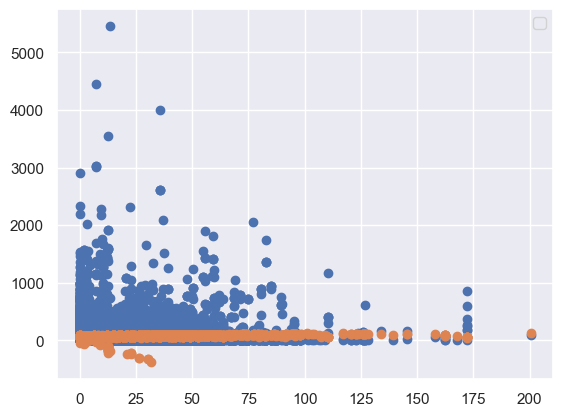

In [ ]:
#Plot
import matplotlib.pyplot as plt
y_fitted=reg1.fitted_values
y=df['cholera']
x=df['rkm']
fig,ax=plt.subplots()
ax.plot(x,y,'o')
ax.plot(x,y_fitted,'o')
ax.legend(loc='best')

### Regression 2 IV2SLS: Control variable (population & county dummy) & Instrumental varibale (lagged rkm)
* $y_{death of cholera}=\beta_0+(\beta_1*population)+\beta_2*countydummy+\beta_3*rkm+\epsilon$
* $rkm=\pi_0+(\pi_1*population)+\pi_2*ruralcounty+\pi_3*rkm_{lag}+\epsilon$

In [27]:
df_iv=pd.read_csv("data/cleaned_data.csv")
df_iv=df_iv.sort_values(by=['org_type_x','org_name_x','year'],ascending=[True,True,False])
df_iv['rkm_lag']=df_iv['rkm'].shift()
df_iv=df_iv.drop(df_iv[df_iv['year']==1875].index)

In [43]:
from linearmodels.iv import IV2SLS
reg2_iv=IV2SLS.from_formula("cholera~1+rural_county+[rkm~rkm_lag]",data=df_iv)
reg2_iv=reg2_iv.fit(cov_type='unadjusted',debiased=True)
print(reg2_iv)



                          IV-2SLS Estimation Summary                          
Dep. Variable:                cholera   R-squared:                      0.0735
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0733
No. Observations:               13034   F-statistic:                    508.60
Date:                Mon, Mar 27 2023   P-value (F-stat)                0.0000
Time:                        19:20:32   Distribution:               F(2,13031)
Cov. Estimator:            unadjusted                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        296.25     7.9517     37.256     0.0000      280.67      311.84
rural_county    -249.42     8.1663    -30.54

In [42]:
#robust test
reg2_rtest=IV2SLS.from_formula("cholera~1+rural_county+population+[rkm~rkm_lag]",data=df_iv)
reg2_rtest=reg2_rtest.fit(cov_type='unadjusted',debiased=True)
print(reg2_rtest)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                cholera   R-squared:                      0.1152
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1150
No. Observations:               13034   F-statistic:                    564.00
Date:                Mon, Mar 27 2023   P-value (F-stat)                0.0000
Time:                        19:20:28   Distribution:               F(3,13030)
Cov. Estimator:            unadjusted                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        179.85     9.0658     19.838     0.0000      162.08      197.62
population       0.0015  6.133e-05     24.90

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


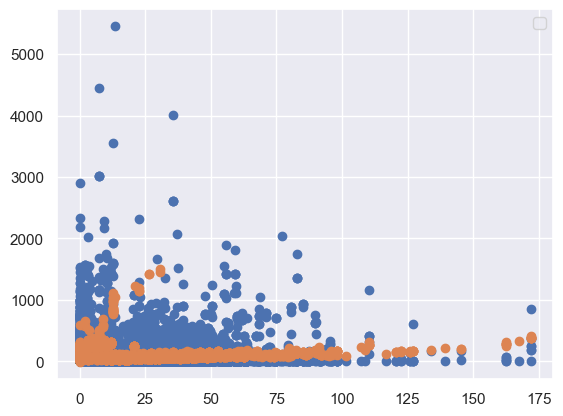

In [ ]:
#Plot
import matplotlib.pyplot as plt
y_fitted_iv=reg2_iv.fitted_values
y_iv=df_iv['cholera']
x_iv=df_iv['rkm']
fig_iv,ax_iv=plt.subplots()
ax_iv.plot(x_iv,y_iv,'o')
ax_iv.plot(x_iv,y_fitted_iv,'o')
ax_iv.legend(loc='best')

### Regression 3 Exogenous variable: production sector & Control variable: area + population + rural county
$y_{death of cholera}=\beta_0*craft+\beta_1*ind+\beta_2*serv+\beta_3*arg+\beta_4*area+\beta_5*population+\beta_6*rural county$

In [14]:
df3=pd.read_csv("data/cleaned_data.csv")
df3=df3[df3['year']==1849]

In [15]:
df3.columns

Index(['Unnamed: 0', 'org_type_x', 'org_name_x', 'match_name', 'match_type',
       'org_rbz_x', 'org_prv_x', 'match_rbz', 'area', 'rkm', 'year', 'cholera',
       'population', 'o_craft_1849', 'o_ind_1849', 'o_serv_1849', 'o_agr_1849',
       'rural_county'],
      dtype='object')

In [26]:
import statsmodels.formula.api as smf
reg3=smf.ols("cholera~area+rural_county+population+o_craft_1849+o_ind_1849+o_serv_1849+o_agr_1849",data=df3).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                cholera   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     62.65
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.64e-57
Time:                        19:13:03   Log-Likelihood:                -2290.3
No. Observations:                 343   AIC:                             4597.
Df Residuals:                     335   BIC:                             4627.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      229.8067     62.394      3.683   

### Regression 4 Exogenous variable: population & Fixed effects
$y_{death of cholera}=\beta_0+\beta_1*population+countyeffect+timeeffect$

In [ ]:
#method 1
# Define the dependent variable
y4 = df['cholera']

# Define the independent variable and control variables
X4 = df['population']

# Add a constant term to the independent variables
X4 = sm.add_constant(X4)

# Fit the panel regression model with fixed effects
reg4 = PanelOLS(y4, X4, entity_effects=True, time_effects=True).fit()

# Print the model summary
print(reg4)

                          PanelOLS Estimation Summary                           
Dep. Variable:                cholera   R-squared:                        0.0010
Estimator:                   PanelOLS   R-squared (Between):             -0.1960
No. Observations:               13377   R-squared (Within):              -0.0011
Date:                Fri, Mar 24 2023   R-squared (Overall):             -0.0376
Time:                        21:23:45   Log-likelihood                -8.689e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.333
Entities:                         331   P-value                           0.0003
Avg Obs:                       40.414   Distribution:                 F(1,13007)
Min Obs:                       39.000                                           
Max Obs:                       117.00   F-statistic (robust):             13.333
                            

### Regression 5
$ind=\beta_0+\beta_1*area+\beta_2*rural county+\beta_3*rkm$

In [23]:
import statsmodels.formula.api as smf
reg5=smf.ols("o_ind_1849~area+rural_county+rkm",data=df3).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:             o_ind_1849   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     25.86
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           4.37e-15
Time:                        19:11:24   Log-Likelihood:                -3331.9
No. Observations:                 343   AIC:                             6672.
Df Residuals:                     339   BIC:                             6687.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8806.1255    982.844      8.960   

### Informative Map

In [47]:
import pandas as pd
import geopandas as gpd

gdf=gpd.read_file('data/cty_shp.gpkg',encoding='utf-8')
df_map=pd.DataFrame(gdf,copy=True)
df_map['TYPE']=df_map['TYPE'].astype("Int64")
df5=pd.read_csv('data/cleaned_data.csv')
df5=df5.rename(columns={"match_name":"NAME","match_type":"TYPE","match_rbz":"RBZ"})

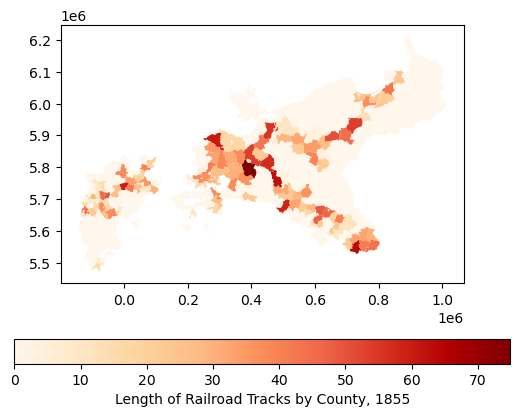

In [52]:
#1855/1849 rkm
df_55=df5[df5['year']==1855]
df_1855=pd.merge(df_map,df_55,how='left',on=['NAME','TYPE','RBZ'])
df_1855.drop(['Unnamed: 0', 'org_type_x', 'org_name_x', 
       'org_rbz_x', 'org_prv_x', 'area', 'year', 
       'population', 'o_craft_1849', 'o_ind_1849', 'o_serv_1849', 'o_agr_1849',
       'rural_county'],axis=1,inplace=True)
df_1855=gpd.GeoDataFrame(df_1855,copy=True)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df_1855.plot(column='rkm', ax=ax, legend=True,
             legend_kwds={'label': "Length of Railroad Tracks by County, 1855",
                          'orientation': "horizontal"},
            cmap='OrRd')
# df_1848.boundary.plot()
# df_1848.plot(facecolor="none", edgecolor="black")
# plt.show()
plt.savefig('data/fig_1855_rkm.png')

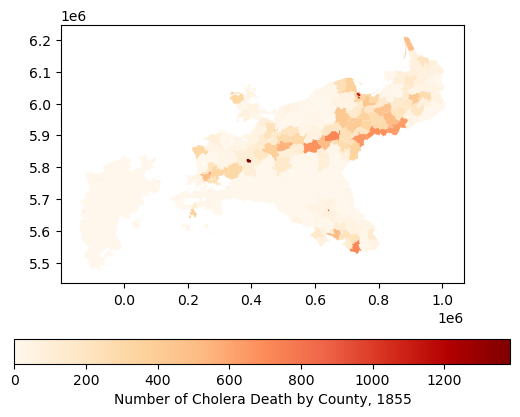

In [53]:
#1855/1873 cholera
fig, ax = plt.subplots(1, 1)
df_1855.plot(column='cholera', ax=ax, legend=True,
             legend_kwds={'label': "Number of Cholera Death by County, 1855",
                          'orientation': "horizontal"},
            cmap='OrRd')
# df_1855.boundary.plot()
# df_1855.plot(facecolor="none", edgecolor="black")
# plt.show()
plt.savefig('data/fig_1855_c.png')